<a href="https://colab.research.google.com/github/Mechanics-Mechatronics-and-Robotics/ML-2025a/blob/main/Week_04/Week_04_Hands_on_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

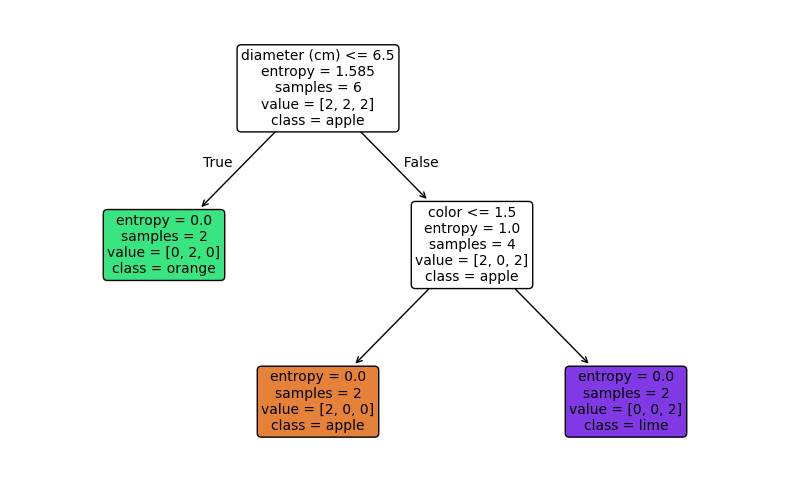

In [1]:
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd
import numpy as np

# -------------------
# Toy dataset: fruits
# -------------------
# Features: [diameter (cm), color (0=green, 1=red, 2=orange)]
X = np.array([
    [7, 1],  # apple
    [8, 1],  # apple
    [7, 2],  # orange
    [9, 2],  # orange
    [6, 0],  # lime
    [5, 0],  # lime
])

y = ["apple", "apple", "orange", "orange", "lime", "lime"]

feature_names = ["diameter (cm)", "color"]
class_names = ["apple", "orange", "lime"]

# -------------------
# Train decision tree
# -------------------
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
clf = clf.fit(X, y)

# -------------------
# Plot tree
# -------------------
plt.figure(figsize=(8, 5))
tree.plot_tree(
    clf,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.tight_layout()
plt.savefig("example-tree.png", dpi=300)
plt.show()


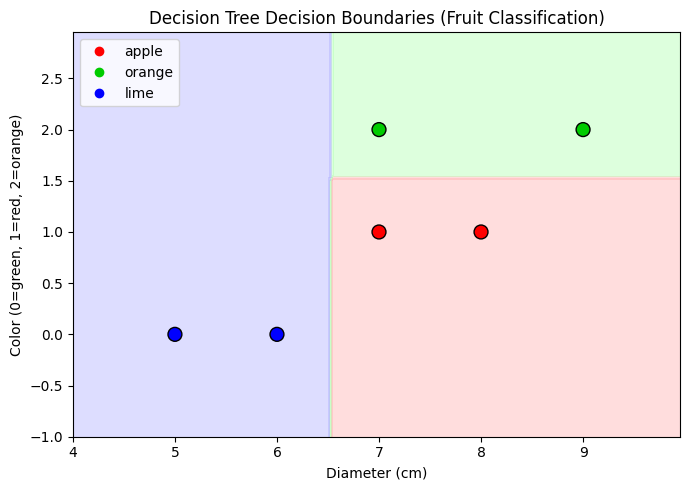

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from matplotlib.colors import ListedColormap

# -------------------
# Toy dataset: fruits
# -------------------
X = np.array([
    [7, 1],  # apple
    [8, 1],  # apple
    [7, 2],  # orange
    [9, 2],  # orange
    [6, 0],  # lime
    [5, 0],  # lime
])

y = np.array([0, 0, 1, 1, 2, 2])  # 0=apple, 1=orange, 2=lime
class_names = ["apple", "orange", "lime"]

# Train decision tree
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
clf.fit(X, y)

# -------------------
# Plot decision regions
# -------------------
# Define grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.05),
    np.arange(y_min, y_max, 0.05)
)

# Predict on grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define custom colormap
cmap_background = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_points = ListedColormap(["#FF0000", "#00CC00", "#0000FF"])

plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.4)

# Plot training points
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points, edgecolor="k", s=100)

# Labels
plt.xlabel("Diameter (cm)")
plt.ylabel("Color (0=green, 1=red, 2=orange)")
plt.title("Decision Tree Decision Boundaries (Fruit Classification)")

# Legend
handles, _ = scatter.legend_elements()
plt.legend(handles, class_names, loc="upper left")

plt.tight_layout()
plt.savefig("example-tree-boundary.png", dpi=300)
plt.show()
